## Fashion Class Classifier

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

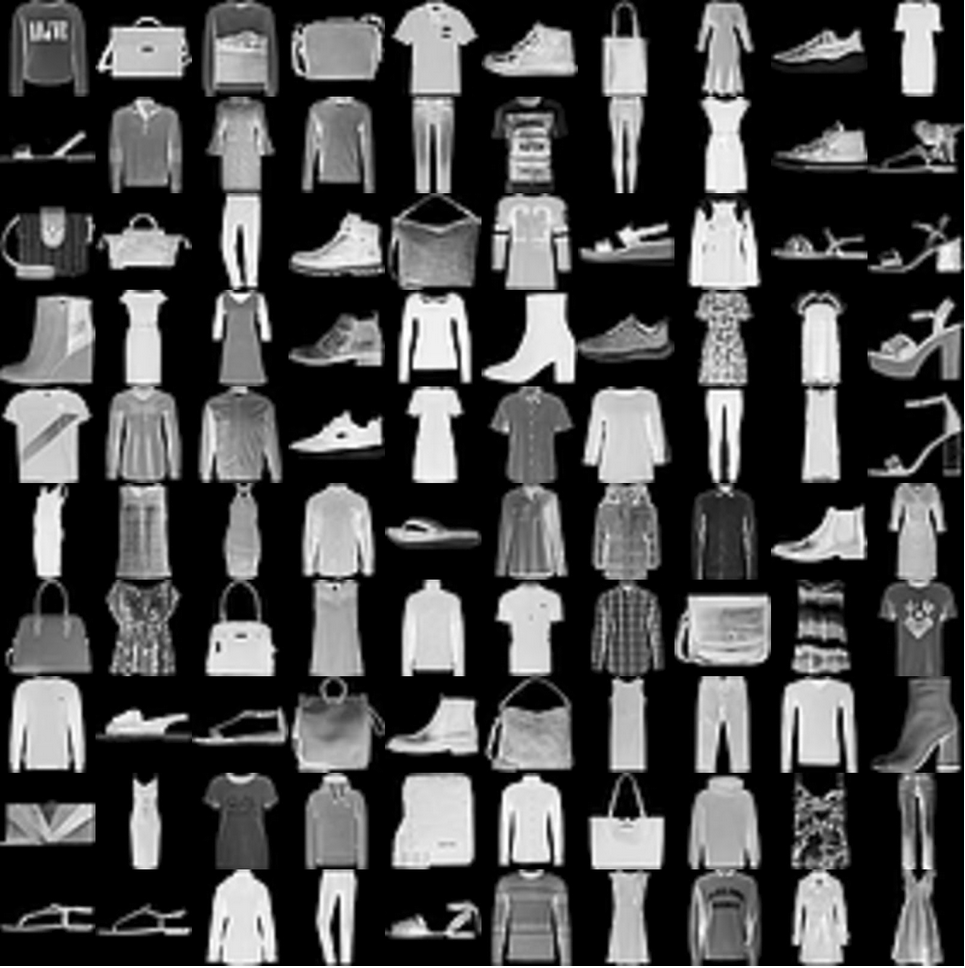


## Getting the tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Getting the data

In [3]:
fashion_train = pd.read_csv('/home/shubham/python/fashion/fashion-mnist_train.csv')
fashion_test = pd.read_csv('/home/shubham/python/fashion/fashion-mnist_test.csv')

In [4]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
pixel1,60000.0,0.000900,0.094689,0.0,0.0,0.0,0.0,16.0
pixel2,60000.0,0.006150,0.271011,0.0,0.0,0.0,0.0,36.0
pixel3,60000.0,0.035333,1.222324,0.0,0.0,0.0,0.0,226.0
pixel4,60000.0,0.101933,2.452871,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
pixel780,60000.0,17.911483,45.149388,0.0,0.0,0.0,0.0,255.0
pixel781,60000.0,8.520633,29.614859,0.0,0.0,0.0,0.0,255.0
pixel782,60000.0,2.753300,17.397652,0.0,0.0,0.0,0.0,255.0
pixel783,60000.0,0.855517,9.356960,0.0,0.0,0.0,0.0,255.0


In [6]:
fashion_train.shape

(60000, 785)

In [7]:
training = np.array(fashion_train, dtype='float32')
testing = np.array(fashion_test, dtype='float32')

9.0

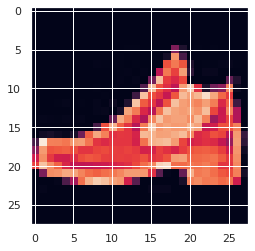

In [8]:
plt.imshow(training[1,1:].reshape(28,28))
label = training[1,0]
label

## Visualize the data as a grid of images

Randomly pick 225 rows and plot the images in a 15 by 15 grid.

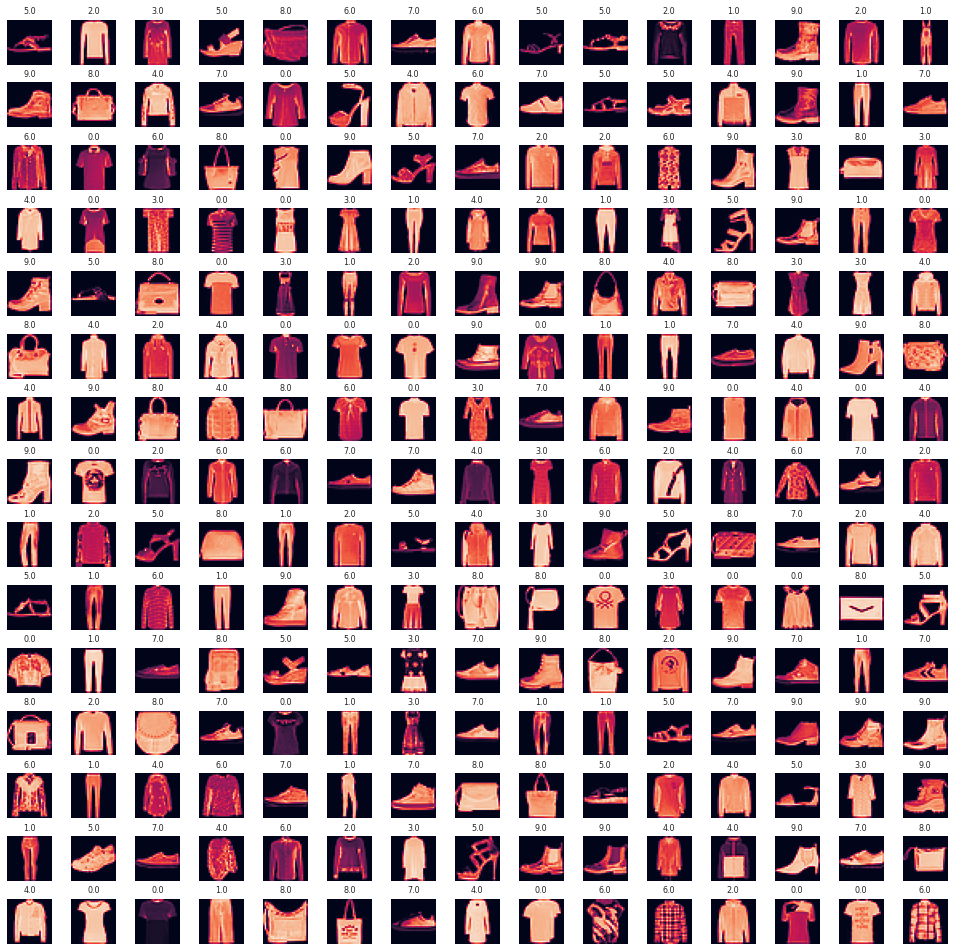

In [9]:
W_grid = 15
L_grid = 15

fig, ax = plt.subplots(L_grid, W_grid, figsize=(17,17))
ax = ax.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    
    index = np.random.randint(0, n_training)
    
    ax[i].imshow(training[index,1:].reshape(28,28))
    ax[i].set_title(training[index,0], fontsize = 8)
    ax[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

#0 => T-shirt/top
#1 => Trouser
#2 => Pullover
#3 => Dress
#4 => Coat
#5 => Sandal
#6 => Shirt
#7 => Sneaker
#8 => Bag
#9 => Ankle boot

In [10]:
training[:,1:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Create training and testing datasets

We will also divide the values by 255 for normalizing

In [11]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

## Prepare the Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [13]:
len(X_train)

48000

In [16]:
# Reshape the data to feed to the deep learning models
X_train = X_train.reshape(X_train.shape[0],*(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0],*(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28, 28, 1))

In [18]:
X_train.shape, X_validate.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## Import Keras and Build the Model

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,
                     input_shape = (28, 28, 1),
                     activation = 'relu')
             )

In [29]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [33]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 32, activation = 'sigmoid'))

In [34]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [35]:
epochs=50

In [40]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512,
              epochs = epochs,
              verbose = 1,
              validation_data =  (X_validate, y_validate)
             )

Epoch 1/50
94/94 [==============================] - 2s 12ms/step - loss: 2.6672 - accuracy: 0.2628 - val_loss: 0.9600 - val_accuracy: 0.6651
Epoch 2/50
94/94 [==============================] - 1s 10ms/step - loss: 0.8808 - accuracy: 0.6874 - val_loss: 0.7357 - val_accuracy: 0.7368
Epoch 3/50
94/94 [==============================] - 1s 11ms/step - loss: 0.7119 - accuracy: 0.7453 - val_loss: 0.6519 - val_accuracy: 0.7621
Epoch 4/50
94/94 [==============================] - 1s 11ms/step - loss: 0.6293 - accuracy: 0.7743 - val_loss: 0.6007 - val_accuracy: 0.7830
Epoch 5/50
94/94 [==============================] - 1s 11ms/step - loss: 0.5834 - accuracy: 0.7896 - val_loss: 0.5644 - val_accuracy: 0.7947
Epoch 6/50
94/94 [==============================] - 1s 11ms/step - loss: 0.5511 - accuracy: 0.8016 - val_loss: 0.5450 - val_accuracy: 0.7997
Epoch 7/50
94/94 [==============================] - 1s 10ms/step - loss: 0.5346 - accuracy: 0.8083 - val_loss: 0.5186 - val_accuracy: 0.8147
Epoch 8/50
94

## Evaluate the Model

In [41]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8624
Test Accuracy : 0.862


In [44]:
predicted_classes = cnn_model.predict_classes(X_test)

/home/shubham/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

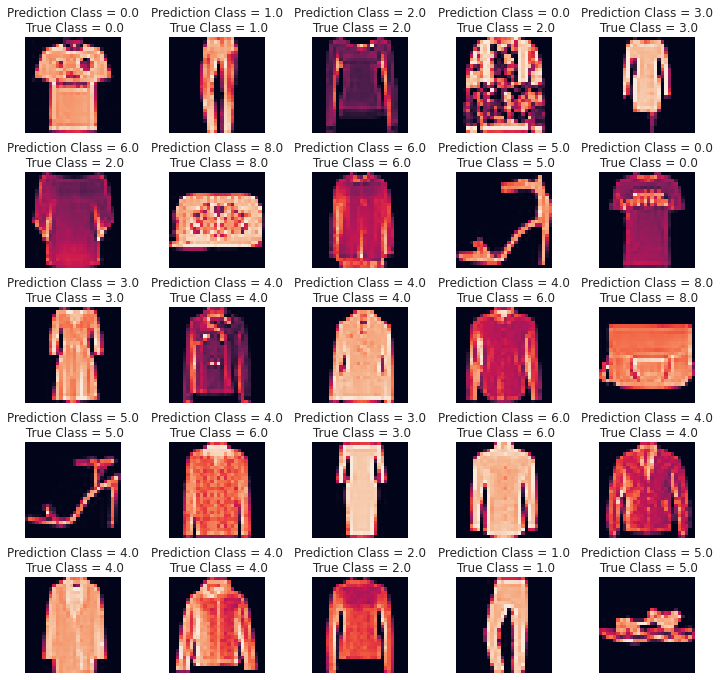

In [46]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<AxesSubplot:>

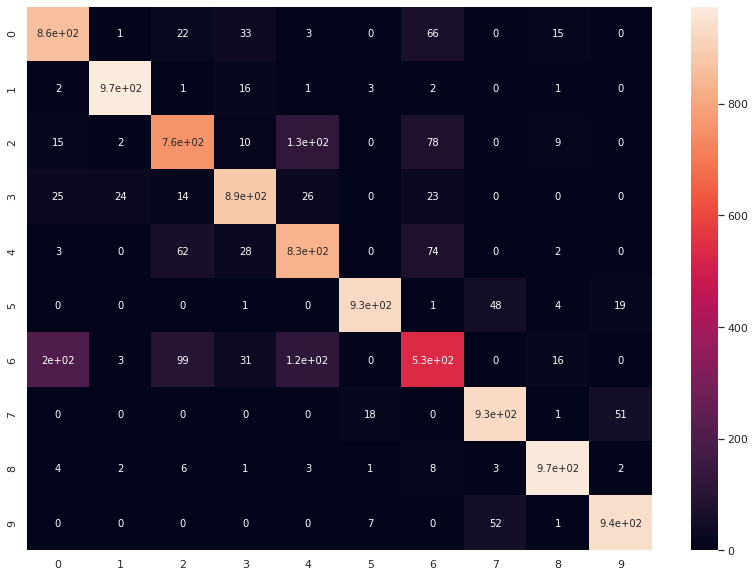

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [48]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.86      0.82      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.79      0.76      0.77      1000
     Class 3       0.88      0.89      0.88      1000
     Class 4       0.75      0.83      0.79      1000
     Class 5       0.97      0.93      0.95      1000
     Class 6       0.68      0.53      0.60      1000
     Class 7       0.90      0.93      0.91      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.93      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

